In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
from sklearn import datasets

In [115]:
X,y=datasets.make_blobs(n_samples=700,
                        n_features=2,
                        centers=2,
                        cluster_std=2.2,
                        random_state=2)

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

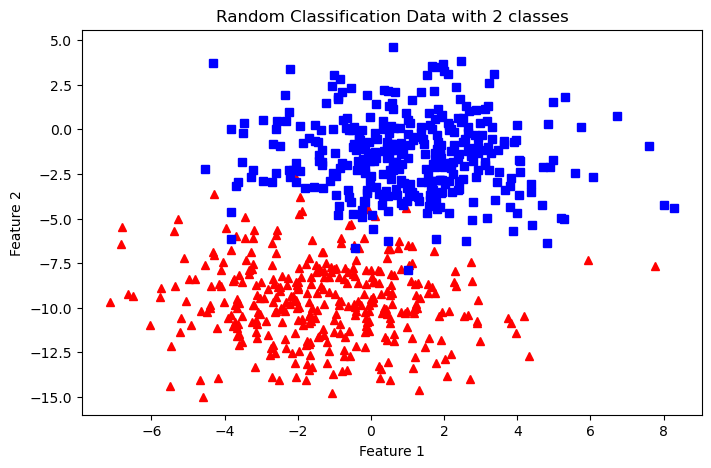

In [116]:
fig=plt.figure(figsize=(8,5))
plt.plot(X[:,0][y==0],X[:,1][y==0],'r^')
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Random Classification Data with 2 classes")


In [117]:
def step_func(z):
    return 1.0 if (z>0) else 0.0


In [118]:
def perceptron(X,y,lr,epochs):
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features
    
    m,n=X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    theta=np.zeros((n+1,1))
    # print("theta is : ",theta)
    # Empty list to store how many examples were
    # misclassified at every iteration.
    n_miss_list=[]
    theta_list=[]
    
    #Training
    for epoch in range(epochs):
        #variable to store miss-classified
        n_miss=0
        #looping for every exmaple
        for idx,x_i in enumerate(X):
            # print(idx,x_i)
            x_i=np.insert(x_i,0,1).reshape(-1,1)
            # print(x_i)
            #calculating prediction/hypothesis
            y_hat=step_func(np.dot(x_i.T,theta))
            # print("x_i transpose and theta ",x_i.T,theta)
            # print(np.dot(x_i.T,theta))
            #updating if the example is missclassified
            #if (np.squeeze(y_hat)-y[idx])!=0
            # print(y_hat)
            if(y_hat-y[idx])!=0:
                theta += lr*((y[idx]-y_hat)*x_i)
                
                #Incrementing by 1
                n_miss+=1
            
            #appending no of missclassified examples 
            #at every iteration
            
        n_miss_list.append(n_miss)
        theta_list.append(theta)
            
            
    return theta,n_miss_list,theta_list
        
        
    
    

In [119]:
# perceptron(X,y,0.1,100)

In [120]:
def plot_decision_boundary(X,theta):
    # X -> Inputs
    # theta -> parameters 
    
    # The line is y=mx+c
    # So, Equate mx+c=theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    
    x1=[min(X[:,0]),max(X[:,0])]
    # print("x1 is ")
    # print(x1)
    
    m=-theta[1]/theta[2]
    c=-theta[0]/theta[2]
    
    x2=m*x1 + c
    
    #plotting
    
    fig=plt.figure(figsize=(10,8))
    plt.plot(X[:,0][y==0],X[:,1][y==0],'r^')
    plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    
    plt.title("Perceptron algorithm")
    plt.plot(x1,x2,'y-')
              


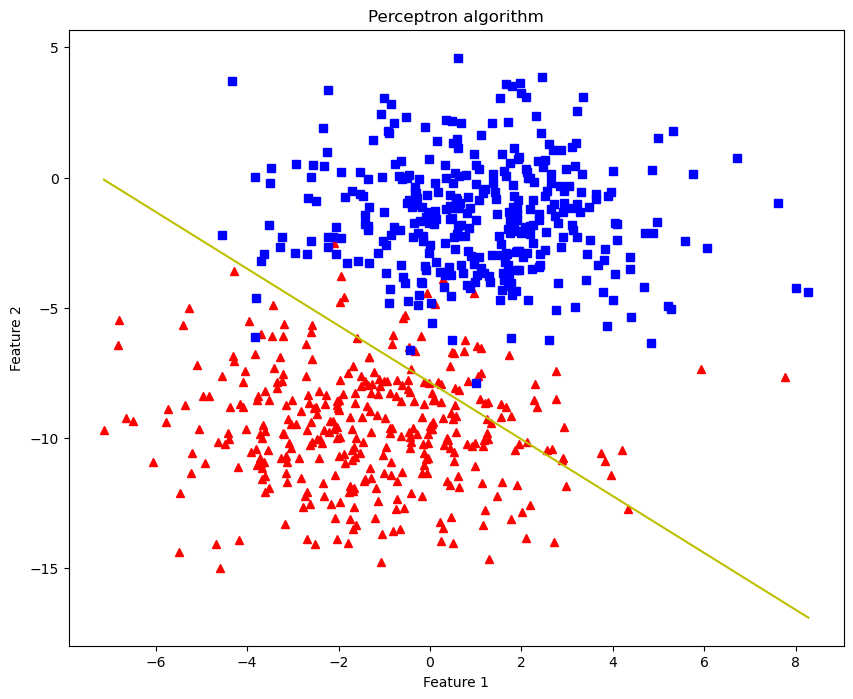

In [127]:
theta,miss_l,tlist=perceptron(X,y,0.1,600)
plot_decision_boundary(X,theta)

In [122]:
# Model parameters (weights and bias)
theta = [0.5, 0.2, -0.3]  # [bias, weight1, weight2]

# Feature vector for a specific example
x_i = [1.0, 2.0,3.0]  # [1.0 is the bias, feature1, feature2]

# Calculate the weighted sum (z)
z = np.dot(theta, x_i)

# Print the result
print("Weighted Sum (z) =", z)

Weighted Sum (z) = 5.551115123125783e-17
